# Data Extraction and EDA: State Weather Data

In [1]:
import sys
# Append path to import helper modules
sys.path.append("../")


import pandas as pd
import pickle
import datetime
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from utilities import states_to_abbrev, abbrev_to_states, days_since_20200101

In [2]:
"""
We're using the format of the states for mobility data. So, let's import that to see what
it looks like:
"""

mobility_data = pickle.load(open("../data/us_state_mobility_data.p", "rb"))
required_states = mobility_data["abbrev"].unique()
print(required_states)
display(mobility_data)
print(mobility_data["date"])

['USA' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID'
 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT'
 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


,date,state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,abbrev,days_since_20200101
94913,2020-02-15,United States,6.0,2.0,15.0,3.0,2.0,-1.0,USA,45
94914,2020-02-16,United States,7.0,1.0,16.0,2.0,0.0,-1.0,USA,46
94915,2020-02-17,United States,6.0,0.0,28.0,-9.0,-24.0,5.0,USA,47
94916,2020-02-18,United States,0.0,-1.0,6.0,1.0,0.0,1.0,USA,48
94917,2020-02-19,United States,2.0,0.0,8.0,1.0,1.0,0.0,USA,49
...,...,...,...,...,...,...,...,...,...,...
304088,2020-04-28,Wyoming,-21.0,1.0,23.0,-7.0,-33.0,5.0,WY,118
304089,2020-04-29,Wyoming,-18.0,3.0,76.0,-3.0,-34.0,11.0,WY,119
304090,2020-04-30,Wyoming,-20.0,1.0,51.0,-1.0,-35.0,12.0,WY,120
304091,2020-05-01,Wyoming,-20.0,3.0,50.0,5.0,-31.0,12.0,WY,121


94913    2020-02-15
94914    2020-02-16
94915    2020-02-17
94916    2020-02-18
94917    2020-02-19
            ...    
304088   2020-04-28
304089   2020-04-29
304090   2020-04-30
304091   2020-05-01
304092   2020-05-02
Name: date, Length: 4056, dtype: datetime64[ns]


In [3]:
mobility_data[mobility_data["abbrev"] == "DC"]

,date,state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,abbrev,days_since_20200101
116572,2020-02-15,District of Columbia,-2.0,-2.0,13.0,-2.0,-2.0,-1.0,DC,45
116573,2020-02-16,District of Columbia,6.0,-1.0,37.0,3.0,0.0,-1.0,DC,46
116574,2020-02-17,District of Columbia,-10.0,-12.0,21.0,-39.0,-52.0,11.0,DC,47
116575,2020-02-18,District of Columbia,-5.0,-2.0,13.0,-3.0,-5.0,1.0,DC,48
116576,2020-02-19,District of Columbia,-2.0,-3.0,7.0,-3.0,-5.0,1.0,DC,49
...,...,...,...,...,...,...,...,...,...,...
116645,2020-04-28,District of Columbia,-62.0,-32.0,-66.0,-77.0,-69.0,22.0,DC,118
116646,2020-04-29,District of Columbia,-58.0,-26.0,-50.0,-76.0,-69.0,26.0,DC,119
116647,2020-04-30,District of Columbia,-66.0,-39.0,-77.0,-81.0,-71.0,31.0,DC,120
116648,2020-05-01,District of Columbia,-59.0,-23.0,-56.0,-74.0,-66.0,27.0,DC,121


In [4]:
"""
There's a ton of columns, but after reading some stuff up, it looks like
the "dry bulb" temperature is the temperature that is meaningful.
"""
columns = ["STATION", "DATE", "REPORT_TYPE", "SOURCE", "AWND", "BackupDirection", "BackupDistance", "BackupDistanceUnit", "BackupElements", "BackupElevation", "BackupElevationUnit", "BackupEquipment", "BackupLatitude", "BackupLongitude", "BackupName", "CDSD", "CLDD", "DSNW", "DailyAverageDewPointTemperature", "DailyAverageDryBulbTemperature", "DailyAverageRelativeHumidity", "DailyAverageSeaLevelPressure", "DailyAverageStationPressure", "DailyAverageWetBulbTemperature", "DailyAverageWindSpeed", "DailyCoolingDegreeDays", "DailyDepartureFromNormalAverageTemperature", "DailyHeatingDegreeDays", "DailyMaximumDryBulbTemperature", "DailyMinimumDryBulbTemperature", "DailyPeakWindDirection", "DailyPeakWindSpeed", "DailyPrecipitation", "DailySnowDepth", "DailySnowfall", "DailySustainedWindDirection", "DailySustainedWindSpeed", "DailyWeather", "HDSD", "HTDD", "HeavyFog", "HourlyAltimeterSetting", "HourlyDewPointTemperature", "HourlyDryBulbTemperature", "HourlyPrecipitation", "HourlyPresentWeatherType", "HourlyPressureChange", "HourlyPressureTendency", "HourlyRelativeHumidity", "HourlySeaLevelPressure", "HourlySkyConditions", "HourlyStationPressure", "HourlyVisibility", "HourlyWetBulbTemperature", "HourlyWindDirection", "HourlyWindGustSpeed", "HourlyWindSpeed", "MonthlyAverageRH", "MonthlyDaysWithGT001Precip", "MonthlyDaysWithGT010Precip", "MonthlyDaysWithGT32Temp", "MonthlyDaysWithGT90Temp", "MonthlyDaysWithLT0Temp", "MonthlyDaysWithLT32Temp", "MonthlyDepartureFromNormalAverageTemperature", "MonthlyDepartureFromNormalCoolingDegreeDays", "MonthlyDepartureFromNormalHeatingDegreeDays", "MonthlyDepartureFromNormalMaximumTemperature", "MonthlyDepartureFromNormalMinimumTemperature", "MonthlyDepartureFromNormalPrecipitation", "MonthlyDewpointTemperature", "MonthlyGreatestPrecip", "MonthlyGreatestPrecipDate", "MonthlyGreatestSnowDepth", "MonthlyGreatestSnowDepthDate", "MonthlyGreatestSnowfall", "MonthlyGreatestSnowfallDate", "MonthlyMaxSeaLevelPressureValue", "MonthlyMaxSeaLevelPressureValueDate", "MonthlyMaxSeaLevelPressureValueTime", "MonthlyMaximumTemperature", "MonthlyMeanTemperature", "MonthlyMinSeaLevelPressureValue", "MonthlyMinSeaLevelPressureValueDate", "MonthlyMinSeaLevelPressureValueTime", "MonthlyMinimumTemperature", "MonthlySeaLevelPressure", "MonthlyStationPressure", "MonthlyTotalLiquidPrecipitation", "MonthlyTotalSnowfall", "MonthlyWetBulb", "NormalsCoolingDegreeDay", "NormalsHeatingDegreeDay", "REM", "REPORT_TYPE", "SOURCE", "ShortDurationEndDate005", "ShortDurationEndDate010", "ShortDurationEndDate015", "ShortDurationEndDate020", "ShortDurationEndDate030", "ShortDurationEndDate045", "ShortDurationEndDate060", "ShortDurationEndDate080", "ShortDurationEndDate100", "ShortDurationEndDate120", "ShortDurationEndDate150", "ShortDurationEndDate180", "ShortDurationPrecipitationValue005", "ShortDurationPrecipitationValue010", "ShortDurationPrecipitationValue015", "ShortDurationPrecipitationValue020", "ShortDurationPrecipitationValue030", "ShortDurationPrecipitationValue045", "ShortDurationPrecipitationValue060", "ShortDurationPrecipitationValue080", "ShortDurationPrecipitationValue100", "ShortDurationPrecipitationValue120", "ShortDurationPrecipitationValue150", "ShortDurationPrecipitationValue180", "Sunrise", "Sunset", "TStorms", "WindEquipmentChangeDate"]
keep = set(["STATION", "REPORT_TYPE", "SOURCE", "AWND", "DailyAverageDryBulbTemperature", "HourlyRelativeHumidity", "HourlyDryBulbTemperature"])
columns_to_remove = set(columns).difference(keep)


In [5]:
"""
Concat all the government weather data together.
"""
RAW_DATA_DIR = "../data/raw_data/"
csv_data = []

for i in range(1, 7):
    csv_data.append(pd.read_csv(f"{RAW_DATA_DIR}state_weather_{i}.csv"))
    

/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,25,26,27,28,29,30,31,32,35,36,37,41,42,43,44,45,48,49,50,51,52,53,54,55,56,58,59,68,69,71,72,85,88,93,96,97,98,99,100,101,102,103,104,105,106,107,114,117,119,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,5,7,8,11,14,19,25,26,27,28,29,30,31,32,33,34,35,36,37,41,42,43,44,45,48,49,50,51,52,53,54,55,56,58,59,60,69,71,72,76,88,93,95,96,97,98,99,100,101,102,103,104,105,106,107,117,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

In [6]:
# What one of the weather CSVs look like:
csv_data[0].head()

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,...,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72216013869,2020-01-01T00:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
1,72216013869,2020-01-01T01:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
2,72216013869,2020-01-01T02:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
3,72216013869,2020-01-01T03:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31
4,72216013869,2020-01-01T04:53:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-05-31


In [7]:
states_weather = pd.concat(csv_data, axis=0)
states_weather = states_weather.rename(columns={"STATION": "station_id"})
states_weather["date"] = pd.to_datetime(states_weather["DATE"], infer_datetime_format=True)
states_weather = states_weather.drop(columns=columns_to_remove)

# An entire dataset for Utah is problematic. Drop it.
states_weather = states_weather[states_weather["station_id"] != "A0001603036"]

states_weather["HourlyDryBulbTemperature"] = pd.to_numeric(
    states_weather["HourlyDryBulbTemperature"], errors="coerce"
)
states_weather["HourlyRelativeHumidity"] = pd.to_numeric(
    states_weather["HourlyRelativeHumidity"], errors="coerce"
)
states_weather = states_weather.dropna(subset=["HourlyDryBulbTemperature"])

display(states_weather)

,station_id,REPORT_TYPE,SOURCE,AWND,DailyAverageDryBulbTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,REPORT_TYPE.1,SOURCE.1,date
0,72216013869,FM-15,7,NaN,NaN,40.0,83.0,FM-15,7,2020-01-01 00:53:00
1,72216013869,FM-15,7,NaN,NaN,39.0,82.0,FM-15,7,2020-01-01 01:53:00
2,72216013869,FM-15,7,NaN,NaN,37.0,86.0,FM-15,7,2020-01-01 02:53:00
3,72216013869,FM-15,7,NaN,NaN,37.0,86.0,FM-15,7,2020-01-01 03:53:00
4,72216013869,FM-15,7,NaN,NaN,36.0,89.0,FM-15,7,2020-01-01 04:53:00
...,...,...,...,...,...,...,...,...,...,...
36666,99999904138,CRN05,I,NaN,NaN,47.0,NaN,CRN05,I,2020-05-06 20:40:00
36667,99999904138,CRN05,I,NaN,NaN,47.0,NaN,CRN05,I,2020-05-06 20:45:00
36668,99999904138,CRN05,I,NaN,NaN,47.0,NaN,CRN05,I,2020-05-06 20:50:00
36669,99999904138,CRN05,I,NaN,NaN,46.0,NaN,CRN05,I,2020-05-06 20:55:00


In [8]:
"""
Ughhhh. The text file for the station IDs is so inconsistently formatted,
so we can't just read it with a pandas or np and a basic delimiter.

The station metadata is global, but we want to extract 
IDS for all of the US states only.
"""

def extract_station_metadata():
    station_df = []
    station_ids = open("../data/raw_data/station_metadata.txt", "r")

    # state start index
    ss_index = 47
    wban_index = 7
    for i, line in enumerate(station_ids):
        # skip header
        if i == 0:
            continue
        state = line[ss_index: ss_index + 3].strip()
        if state.isspace():
            continue
        else:
            # It's a US state. Start parsing.
            wban_id = line[wban_index: wban_index + 6].strip()
            station_meta = line[0:7].strip()
            # Because why not?
            lattitude = line[57:66].strip()
            longitude = line[65:75].strip()
            elevation = line[74:82].strip()
            station_name = line[13:43].strip()
            station_id = f"{station_meta}{wban_id}"
            try:
                # The weather data has the station ID as an integer. 
                # Data types must match up in the join, so throw out anything that's not
                # castable to an int.
                station_id = int(station_id)
            except:
                continue
            row = {
                "wban_id": int(wban_id),
                "state": state,
                "station_meta": station_meta,
                "lattitude": lattitude,
                "longitude": longitude,
                "elevation": elevation,
                "station_name": station_name,
                "station_id": station_id
            }
            station_df.append(row)
    result = pd.DataFrame(station_df)
    return result

station_df = extract_station_metadata()
display(station_df)

,wban_id,state,station_meta,lattitude,longitude,elevation,station_name,station_id
0,99999,,007018,+00.000 +,+000.000 +,+7018.0,WXPOD 7018,701899999
1,99999,,007026,+00.000 +,+000.000 +,+7026.0,WXPOD 7026,702699999
2,99999,,007070,+00.000 +,+000.000 +,+7070.0,WXPOD 7070,707099999
3,99999,,008260,+00.000 +,+000.000 +,+0000.0,WXPOD8270,826099999
4,99999,,008268,+32.950 +,+065.567 +,+1156.7,WXPOD8278,826899999
...,...,...,...,...,...,...,...,...
29703,96405,AK,999999,+60.473 -,-145.354 +,+0025.3,CORDOVA 14 ESE,99999996405
29704,96406,AK,999999,+64.502 -,-154.130 +,+0078.9,RUBY 44 ESE,99999996406
29705,96407,AK,999999,+66.562 -,-159.004 +,+0006.7,SELAWIK 28 E,99999996407
29706,96408,AK,999999,+63.452 -,-150.875 +,+0678.2,DENALI 27 N,99999996408


In [9]:
states_df = states_weather.merge(station_df, left_on="station_id", right_on="station_id")

In [10]:
"""
Now, let's check to be sure there's data for all states. Hopefully we are not missing any!
"""
grouped_states = states_df.groupby(["station_name", "station_id", "state"]).agg(
    {"station_name": "first", "station_id": "first", "state": "first"}
).reset_index(drop=True)
states_list = set(grouped_states["state"].values)

all_states = [
    'AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 
    'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 
    'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 
    'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY'
]

missing_states = set(all_states).difference(states_list)
ms_full = [abbrev_to_states[x] for x in list(missing_states)]
print(ms_full)

['Puerto Rico', 'District of Columbia']


## Note from above that there is no data for DC and Puero Rico

In [11]:
"""
Missing states above. 

There are some errors with the datasets from GOV, marked with a "warning" sign, so
I will re-investigate. Since I had to download these states one-by-one, will investigate after I get an initial weather 
dataset crunched.
"""
weather_df = states_df.groupby(
    ["state", states_df["date"].dt.year, states_df["date"].dt.month, states_df["date"].dt.day]
).agg({
    "state": "first",
    "date": "first",
    "HourlyDryBulbTemperature": "mean",
    "HourlyRelativeHumidity": lambda x: list(x),
}).rename(columns={"HourlyDryBulbTemperature": "average_temperature"}).reset_index(drop=True)

weather_df["abbrev"] = weather_df["state"]
weather_df["state"] = weather_df["state"].apply(lambda x: abbrev_to_states[x])
weather_df["date"] = weather_df["date"].dt.date

In [12]:
weather_df["average_humidity"] = weather_df["HourlyRelativeHumidity"].apply(
    lambda x: np.nanmean(np.array(x))
)
weather_df = weather_df.drop(columns=["HourlyRelativeHumidity"])
display(weather_df)

/Users/Emily/opt/anaconda3/envs/cs109b/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


,state,date,average_temperature,abbrev,average_humidity
0,Alaska,2020-01-01,29.145161,AK,79.258065
1,Alaska,2020-01-02,26.428571,AK,74.428571
2,Alaska,2020-01-03,23.725000,AK,85.175000
3,Alaska,2020-01-04,33.174603,AK,91.222222
4,Alaska,2020-01-05,27.931034,AK,77.241379
...,...,...,...,...,...
6665,Wyoming,2020-05-02,42.972973,WY,74.567568
6666,Wyoming,2020-05-03,44.666667,WY,62.111111
6667,Wyoming,2020-05-04,42.458333,WY,32.958333
6668,Wyoming,2020-05-05,42.500000,WY,42.583333


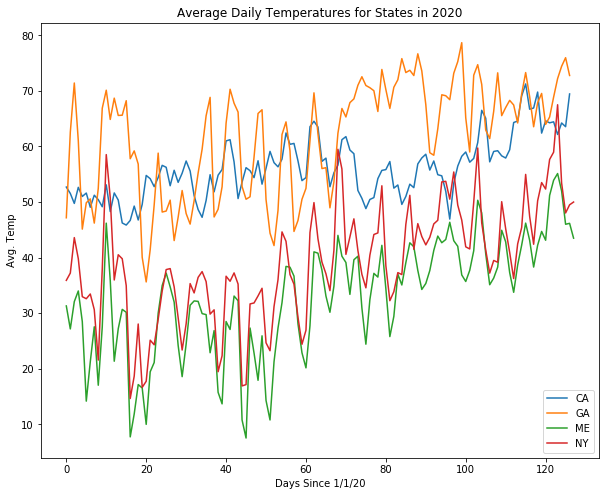

In [13]:
"""
Below is just a plot of the daily temperatures for some states.
"""
plt.figure(figsize=(10, 8))
plt.title("Average Daily Temperatures for States in 2020")
plt.xlabel("Days Since 1/1/20")
plt.ylabel("Avg. Temp")
for state in abbrev_to_states.keys():
    if state in ["NY", "ME", "CA", "GA"]:
        avg_temps = weather_df[weather_df["abbrev"] == state]["average_temperature"].values
        plt.plot(avg_temps, label=state)
plt.legend()

In [261]:
# """
# Since all states need consistent time-series data,
# let's check to see what state is missing:
# """
# for abbrev in required_states:
#     if abbrev == "DC" or abbrev == "USA":
#         continue
#     print(f"For {abbrev}, missing:")
#     # Get minimum and maximum date per state.
#     min_date = weather_df[weather_df["abbrev"] == abbrev]["date"].min()
#     max_date = weather_df[weather_df["abbrev"] == abbrev]["date"].max()
#     missing_dates_per_state = pd.date_range(start=min_date, end=max_date).difference(
#         weather_df[weather_df["abbrev"] == abbrev]["date"].values
#     )
#     print(missing_dates_per_state)

In [14]:
def impute_missing_dates(df):
    '''
    function that imputes cases and deaths data for missing 
    dates with 0. returned df should have same MIN_DATE and 
    MAX_DATE for all states.
    '''
    # set min values
    MIN_DATE = df["date"].min()
    MIN_CASES = 0
    MIN_DEATHS = 0
    
    # iterate through all states
    imputed_data = []    
    for state in df["state"].unique():
        # build list of missing dates
        # https://stackoverflow.com/questions/7274267/print-all-day-dates-between-two-dates
        sdate = MIN_DATE
        edate = df.loc[df["state"] == state]["date"].min()
        delta = edate - sdate 

        # iterate through all missing dates and impute case and 
        # death data
        for i in range(delta.days):
            day = sdate + datetime.timedelta(days=i)
            imputed_data.append({"date": day,
                                 "state": state,
                                 "average_temperature": df.loc[df["state"]==state].iloc[0]["average_temperature"],
                                 "abbrev": states_to_abbrev[state],
                                 "average_humidity": df.loc[df["state"]==state].iloc[0]["average_humidity"],
                                })

    # final cleanup
    new_df = pd.concat([pd.DataFrame(imputed_data), df])
    new_df = new_df.sort_values(by=["state", "date"]).reset_index().drop("index", axis=1)
    
    return new_df
    
cleaned_data = impute_missing_dates(weather_df)
display(cleaned_data)

,date,state,average_temperature,abbrev,average_humidity
0,2020-01-01,Alabama,44.541667,AL,59.041667
1,2020-01-02,Alabama,52.654321,AL,94.580247
2,2020-01-03,Alabama,59.816327,AL,96.040816
3,2020-01-04,Alabama,52.139535,AL,78.511628
4,2020-01-05,Alabama,41.708333,AL,69.708333
...,...,...,...,...,...
6730,2020-05-02,Wyoming,42.972973,WY,74.567568
6731,2020-05-03,Wyoming,44.666667,WY,62.111111
6732,2020-05-04,Wyoming,42.458333,WY,32.958333
6733,2020-05-05,Wyoming,42.500000,WY,42.583333


In [15]:
"""
Just use Maryland's data for DC.
"""
def create_dc(df):
    df = df.copy()
    min_date = df["date"].min()
    max_date = df["date"].max()
    md_data = []    
    for date in pd.date_range(start=min_date, end=max_date):
        md = df[np.logical_and(df["abbrev"] == "MD", df["date"] == date)]
        data = {
            "date": date.date(),
            "state": "DC",
            "abbrev": "District of Columbia",
            "average_temperature": md["average_temperature"].values[0],
            "average_humidity": md["average_humidity"].values[0],
        }
        md_data.append(data)
    return pd.concat([df, pd.DataFrame(md_data)], axis=0)

cleaned_data_with_md = create_dc(cleaned_data)

In [16]:
cleaned_data_with_md

,date,state,average_temperature,abbrev,average_humidity
0,2020-01-01,Alabama,44.541667,AL,59.041667
1,2020-01-02,Alabama,52.654321,AL,94.580247
2,2020-01-03,Alabama,59.816327,AL,96.040816
3,2020-01-04,Alabama,52.139535,AL,78.511628
4,2020-01-05,Alabama,41.708333,AL,69.708333
...,...,...,...,...,...
123,2020-05-03,DC,62.342857,District of Columbia,78.029412
124,2020-05-04,DC,63.166667,District of Columbia,65.551724
125,2020-05-05,DC,51.517241,District of Columbia,66.785714
126,2020-05-06,DC,47.888889,District of Columbia,92.641509


In [17]:

"""
And create a USA state
"""
def create_usa_state(df):
    df = df.copy()
    min_date = df["date"].min()
    max_date = df["date"].max()
    us_data = []    
    for date in pd.date_range(start=min_date, end=max_date):
        all_states = df[df["date"] == date]
        data = {
                    "date": date.date(),
                    "state": "United States",
                    "abbrev": "USA",
                    "average_temperature": np.nanmean(all_states["average_temperature"].values),
                    "average_humidity": np.nanmean(all_states["average_humidity"].values),
                }
        us_data.append(data)
    us_df = pd.DataFrame(us_data)
    return pd.concat([df, us_df], axis=0)

weather_state_usa = create_usa_state(cleaned_data_with_md)
weather_state_usa["date"] = pd.to_datetime(weather_state_usa["date"])

In [266]:
def days_since(df):
    df = df.copy()
    # Austin's function for labeling create days_since_20200101 col
    START_DATE = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
    df["days_since_20200101"] = (df["date"] - START_DATE)
    return df

weather_state_usa = days_since(weather_state_usa)

In [267]:
weather_state_usa

,date,state,average_temperature,abbrev,average_humidity,days_since_20200101
0,2020-01-01,Alabama,44.541667,AL,59.041667,0 days
1,2020-01-02,Alabama,52.654321,AL,94.580247,1 days
2,2020-01-03,Alabama,59.816327,AL,96.040816,2 days
3,2020-01-04,Alabama,52.139535,AL,78.511628,3 days
4,2020-01-05,Alabama,41.708333,AL,69.708333,4 days
...,...,...,...,...,...,...
123,2020-05-03,United States,63.645243,USA,63.452256,123 days
124,2020-05-04,United States,60.972682,USA,63.207981,124 days
125,2020-05-05,United States,58.290780,USA,63.511395,125 days
126,2020-05-06,United States,57.020044,USA,61.860205,126 days


In [243]:
# dump to pickle file
pickle.dump(weather_state_usa, open("../data/daily_average_temp_by_state.p", "wb" ))